# Lesson 0040 - The Bible Word Cloud (II)
In this lesson, we will approach the task of [lesson 0039](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0039_the_bible_word_cloud.ipynb) from a different angle. In [lesson 0039](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0039_the_bible_word_cloud.ipynb), we considered $9$ words as neighbourhood, regardless of the fact whether these words are in the same sentence or not. In this lesson, we will define the neighbourhood of a given word as the sentence in which that word appears.<br>
We start with stealing code from [lesson 0039](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0039_the_bible_word_cloud.ipynb).

In [1]:
import tensorflow as tf

tf.set_random_seed( 1234567890 )

print( tf.__version__ )

1.13.1


In [2]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.16.2


In [3]:
import keras
from keras import models
from keras import layers
from keras import utils
import keras.backend as b

print( keras.__version__ )

2.2.4


Using TensorFlow backend.


In [4]:
path = utils.get_file( "bible.txt", 
                      origin = "https://raw.githubusercontent.com/mxw/grmr/master/src/finaltests/bible.txt" )

text = open( path ).read().lower()

print( text[ 0 : 1000 ] )

1:1 in the beginning god created the heaven and the earth.

1:2 and the earth was without form, and void; and darkness was upon
the face of the deep. and the spirit of god moved upon the face of the
waters.

1:3 and god said, let there be light: and there was light.

1:4 and god saw the light, that it was good: and god divided the light
from the darkness.

1:5 and god called the light day, and the darkness he called night.
and the evening and the morning were the first day.

1:6 and god said, let there be a firmament in the midst of the waters,
and let it divide the waters from the waters.

1:7 and god made the firmament, and divided the waters which were
under the firmament from the waters which were above the firmament:
and it was so.

1:8 and god called the firmament heaven. and the evening and the
morning were the second day.

1:9 and god said, let the waters under the heaven be gathered together
unto one place, and let the dry land appear: and it was so.

1:10 and god called the d

Now, we limit the text to the first $10\%$, also, we split the text at the ".".

In [5]:
new_text = text[ 0 : np.int( np.round( np.float( len( text ) / 10 ) ) ) ].split( "." )



print( new_text[ 0 : 10 ] )

['1:1 in the beginning god created the heaven and the earth', '\n\n1:2 and the earth was without form, and void; and darkness was upon\nthe face of the deep', ' and the spirit of god moved upon the face of the\nwaters', '\n\n1:3 and god said, let there be light: and there was light', '\n\n1:4 and god saw the light, that it was good: and god divided the light\nfrom the darkness', '\n\n1:5 and god called the light day, and the darkness he called night', '\nand the evening and the morning were the first day', '\n\n1:6 and god said, let there be a firmament in the midst of the waters,\nand let it divide the waters from the waters', '\n\n1:7 and god made the firmament, and divided the waters which were\nunder the firmament from the waters which were above the firmament:\nand it was so', '\n\n1:8 and god called the firmament heaven']


In [6]:
import string



punctuation = string.punctuation


new_punctuation = []


for i in range( len( punctuation ) ):
    
    new_punctuation.append( punctuation[ i ] )
    
    
    
    
new_punctuation.append( "\n" )

new_punctuation.append( "0" )

new_punctuation.append( "1" )

new_punctuation.append( "2" )

new_punctuation.append( "3" )

new_punctuation.append( "4" )

new_punctuation.append( "5" )

new_punctuation.append( "6" )

new_punctuation.append( "7" )

new_punctuation.append( "8" )

new_punctuation.append( "9" )

new_punctuation.append( "" )




punctuation = new_punctuation





concat = ""




for item in punctuation:
    
    concat = concat + item
    
    
    

punctuation = concat




punctuation = punctuation.replace( ".", "" )




print( punctuation )

!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~
0123456789


Next, we remove the characters from __punctuation__ from every sentence in __new_text__.

In [7]:
new_text2 = []



replace = str.maketrans( "", "", punctuation )



for sentence in new_text:
    
    new_sentence = sentence.split( )
    
    new_sentence2 = []
    
    
    
    
    for word in new_sentence:
        
        word = word.translate( replace )
    
        if word != "":
            
            new_sentence2.append( word )
    
    
    
    if len( new_sentence2 ) > 1:
    
        new_text2.append( new_sentence2 )
    
    

    
new_text = new_text2


    
    
print( new_text[ 0 : 10 ] )

[['in', 'the', 'beginning', 'god', 'created', 'the', 'heaven', 'and', 'the', 'earth'], ['and', 'the', 'earth', 'was', 'without', 'form', 'and', 'void', 'and', 'darkness', 'was', 'upon', 'the', 'face', 'of', 'the', 'deep'], ['and', 'the', 'spirit', 'of', 'god', 'moved', 'upon', 'the', 'face', 'of', 'the', 'waters'], ['and', 'god', 'said', 'let', 'there', 'be', 'light', 'and', 'there', 'was', 'light'], ['and', 'god', 'saw', 'the', 'light', 'that', 'it', 'was', 'good', 'and', 'god', 'divided', 'the', 'light', 'from', 'the', 'darkness'], ['and', 'god', 'called', 'the', 'light', 'day', 'and', 'the', 'darkness', 'he', 'called', 'night'], ['and', 'the', 'evening', 'and', 'the', 'morning', 'were', 'the', 'first', 'day'], ['and', 'god', 'said', 'let', 'there', 'be', 'a', 'firmament', 'in', 'the', 'midst', 'of', 'the', 'waters', 'and', 'let', 'it', 'divide', 'the', 'waters', 'from', 'the', 'waters'], ['and', 'god', 'made', 'the', 'firmament', 'and', 'divided', 'the', 'waters', 'which', 'were', '

In [8]:
individual_words = dict()

individual_words_reverse = dict()

number_of_appearences = dict()

index = 0






for sentence in new_text:
    
    for word in sentence:
        
        if word not in individual_words_reverse:
            
            individual_words[ index ] = word
            
            individual_words_reverse[ word ] = index
            
            number_of_appearences[ word ] = 1
            
            index = index + 1
            
        else:
            
            number_of_appearences[ word ] = number_of_appearences[ word ] + 1

In [9]:
new_text2 = []






for sentence in new_text:
    
    new_sentence = []
    
    for word in sentence:
        
        if number_of_appearences[ word ] > 6:
            
            new_sentence.append( word )
            
            
            
    if len( new_sentence ) > 1:
        
        new_text2.append( new_sentence )



        
        
        
new_text = new_text2

print( new_text[ 0 : 10 ] )

[['in', 'the', 'god', 'created', 'the', 'heaven', 'and', 'the', 'earth'], ['and', 'the', 'earth', 'was', 'without', 'and', 'and', 'darkness', 'was', 'upon', 'the', 'face', 'of', 'the'], ['and', 'the', 'spirit', 'of', 'god', 'upon', 'the', 'face', 'of', 'the', 'waters'], ['and', 'god', 'said', 'let', 'there', 'be', 'light', 'and', 'there', 'was', 'light'], ['and', 'god', 'saw', 'the', 'light', 'that', 'it', 'was', 'good', 'and', 'god', 'divided', 'the', 'light', 'from', 'the', 'darkness'], ['and', 'god', 'called', 'the', 'light', 'day', 'and', 'the', 'darkness', 'he', 'called', 'night'], ['and', 'the', 'evening', 'and', 'the', 'morning', 'were', 'the', 'first', 'day'], ['and', 'god', 'said', 'let', 'there', 'be', 'a', 'firmament', 'in', 'the', 'midst', 'of', 'the', 'waters', 'and', 'let', 'it', 'divide', 'the', 'waters', 'from', 'the', 'waters'], ['and', 'god', 'made', 'the', 'firmament', 'and', 'divided', 'the', 'waters', 'which', 'were', 'under', 'the', 'firmament', 'from', 'the', 'wa

In [10]:
individual_words.clear()

individual_words_reverse.clear()

number_of_appearences.clear()

index = 0

        
        
        
        
for sentence in new_text:
    
    for word in sentence:
        
        if word not in individual_words_reverse:
            
            individual_words[ index ] = word
            
            individual_words_reverse[ word ] = index
            
            number_of_appearences[ word ] = 1
            
            index = index + 1
            
        else:
            
            number_of_appearences[ word ] = number_of_appearences[ word ] + 1
        
        
        

        
print( index )

999


Now, we count the number of words we have in __new_text__ to find out how many rows we need.

In [11]:
number_of_words = 0


for sentence in new_text:
    
    number_of_words = number_of_words + len( sentence )
    
    

    
print( number_of_words )

75091


In [12]:
neighborhood = np.zeros( shape = [ number_of_words, index ], dtype = np.bool )

neighbor = np.zeros( shape = [ number_of_words, index ], dtype = np.bool )




j = 0




for sentence in new_text:
    
    for word in sentence:
        
        current_sentence = sentence.copy()
        
        current_sentence.remove( word )
        
        
        
        neighbor[ j, individual_words_reverse[ word ] ] = 1
        
        
        
        
        for word2 in current_sentence:
            
            neighborhood[ j, individual_words_reverse[ word2 ] ] = 1
            
            
            
        j = j + 1

In [13]:
input_ = keras.engine.input_layer.Input( shape = ( index, ) )

x = layers.Dense( 256, activation = layers.LeakyReLU( alpha = 0.3 ) )( input_ )

output = layers.Dense( index, activation = "softmax" )( x )

model = keras.Model( input_, output )

model.compile( optimizer = keras.optimizers.SGD( lr = 0.1, momentum = 0.0, decay = 0.0, nesterov = False ),
               loss = "categorical_crossentropy", metrics = [ "accuracy" ] )

model.fit( neighborhood, neighbor, epochs = 1000, batch_size = 100 )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


C:\Users\rhopi\Anaconda3\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Epoch 1/1000
75091/75091 [==============================] - 4s 56us/step - loss: 5.4547 - acc: 0.1032
Epoch 2/1000
75091/75091 [==============================] - 2s 29us/step - loss: 5.1549 - acc: 0.1110
Epoch 3/1000
75091/75091 [==============================] - 2s 30us/step - loss: 5.0470 - acc: 0.1123
Epoch 4/1000
75091/75091 [==============================] - 2s 30us/step - loss: 4.9571 - acc: 0.1138
Epoch 5/1000
75091/75091 [==============================] - 2s 30us/step - loss: 4.8798 - acc: 0.1166
Epoch 6/1000
75091/75091 [==============================] - 2s 30us/step - loss: 4.8138 - acc: 0.1159
Epoch 7/1000
75091/75091 [==============================] - 2s 30us/step - loss: 4.7543 - acc: 0.1177
Epoch 8/1000
75091/75091 [==============================] - 2s 30us/step - loss: 4.7009 - acc: 0.1184
Epoch 9/1000
75091/75091 [==============================] - 2s 30us/step - loss: 4.6500 - acc: 0.1204
Epoch 10/1000
75091/75091 [==============================] - 2s 30us/step - loss: 

75091/75091 [==============================] - 2s 32us/step - loss: 2.5226 - acc: 0.3676
Epoch 81/1000
75091/75091 [==============================] - 2s 31us/step - loss: 2.4989 - acc: 0.3721
Epoch 82/1000
75091/75091 [==============================] - 2s 31us/step - loss: 2.4737 - acc: 0.3773
Epoch 83/1000
75091/75091 [==============================] - 2s 31us/step - loss: 2.4524 - acc: 0.3799
Epoch 84/1000
75091/75091 [==============================] - 2s 31us/step - loss: 2.4296 - acc: 0.3844
Epoch 85/1000
75091/75091 [==============================] - 2s 32us/step - loss: 2.4101 - acc: 0.3857
Epoch 86/1000
75091/75091 [==============================] - 2s 31us/step - loss: 2.3878 - acc: 0.3910
Epoch 87/1000
75091/75091 [==============================] - 2s 31us/step - loss: 2.3702 - acc: 0.3949
Epoch 88/1000
75091/75091 [==============================] - 2s 31us/step - loss: 2.3434 - acc: 0.3998
Epoch 89/1000
75091/75091 [==============================] - 2s 32us/step - loss: 2.325

75091/75091 [==============================] - 2s 32us/step - loss: 1.4460 - acc: 0.5835
Epoch 160/1000
75091/75091 [==============================] - ETA: 0s - loss: 1.4387 - acc: 0.585 - 2s 32us/step - loss: 1.4391 - acc: 0.5852
Epoch 161/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.4373 - acc: 0.5852
Epoch 162/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.4302 - acc: 0.5870
Epoch 163/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.4249 - acc: 0.5887
Epoch 164/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.4180 - acc: 0.5891
Epoch 165/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.4131 - acc: 0.5901
Epoch 166/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.4071 - acc: 0.5899
Epoch 167/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.4027 - acc: 0.5921
Epoch 168/1000
75091/75091 [=============

75091/75091 [==============================] - 2s 31us/step - loss: 1.1963 - acc: 0.6262
Epoch 238/1000
75091/75091 [==============================] - 2s 32us/step - loss: 1.1990 - acc: 0.6253
Epoch 239/1000
75091/75091 [==============================] - 2s 32us/step - loss: 1.1918 - acc: 0.6266
Epoch 240/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.1944 - acc: 0.6262
Epoch 241/1000
75091/75091 [==============================] - 2s 32us/step - loss: 1.1923 - acc: 0.6259
Epoch 242/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.1923 - acc: 0.6255
Epoch 243/1000
75091/75091 [==============================] - 2s 32us/step - loss: 1.1866 - acc: 0.6276
Epoch 244/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.1868 - acc: 0.6262
Epoch 245/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.1857 - acc: 0.6261
Epoch 246/1000
75091/75091 [==============================] - 2s 30us/step - lo

75091/75091 [==============================] - 2s 31us/step - loss: 1.1249 - acc: 0.6314
Epoch 316/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.1226 - acc: 0.6305
Epoch 317/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.1199 - acc: 0.6316
Epoch 318/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.1242 - acc: 0.6306
Epoch 319/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.1216 - acc: 0.6302
Epoch 320/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.1165 - acc: 0.6332
Epoch 321/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.1198 - acc: 0.6312
Epoch 322/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.1189 - acc: 0.6322
Epoch 323/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.1181 - acc: 0.6320
Epoch 324/1000
75091/75091 [==============================] - 2s 31us/step - lo

75091/75091 [==============================] - 2s 31us/step - loss: 1.0875 - acc: 0.6325
Epoch 394/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.0893 - acc: 0.6321
Epoch 395/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.0867 - acc: 0.6323
Epoch 396/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.0889 - acc: 0.6329
Epoch 397/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.0855 - acc: 0.6341
Epoch 398/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.0867 - acc: 0.6315
Epoch 399/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.0880 - acc: 0.6325
Epoch 400/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.0856 - acc: 0.6349
Epoch 401/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.0858 - acc: 0.6327
Epoch 402/1000
75091/75091 [==============================] - 2s 31us/step - lo

75091/75091 [==============================] - 2s 30us/step - loss: 1.0685 - acc: 0.6337
Epoch 472/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0670 - acc: 0.6344
Epoch 473/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0662 - acc: 0.6349
Epoch 474/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0676 - acc: 0.6340
Epoch 475/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0659 - acc: 0.6335
Epoch 476/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0656 - acc: 0.6351
Epoch 477/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0669 - acc: 0.6346
Epoch 478/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0664 - acc: 0.6350
Epoch 479/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0641 - acc: 0.6343
Epoch 480/1000
75091/75091 [==============================] - 2s 30us/step - lo

75091/75091 [==============================] - 2s 30us/step - loss: 1.0529 - acc: 0.6359
Epoch 550/1000
75091/75091 [==============================] - 2s 29us/step - loss: 1.0521 - acc: 0.6337
Epoch 551/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0507 - acc: 0.6342
Epoch 552/1000
75091/75091 [==============================] - 2s 29us/step - loss: 1.0527 - acc: 0.6346
Epoch 553/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0510 - acc: 0.6348
Epoch 554/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0507 - acc: 0.6345
Epoch 555/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0510 - acc: 0.6358
Epoch 556/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0503 - acc: 0.6346
Epoch 557/1000
75091/75091 [==============================] - 2s 29us/step - loss: 1.0533 - acc: 0.6329
Epoch 558/1000
75091/75091 [==============================] - 2s 29us/step - lo

75091/75091 [==============================] - 2s 30us/step - loss: 1.0421 - acc: 0.6347
Epoch 628/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.0414 - acc: 0.6349
Epoch 629/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0418 - acc: 0.6349
Epoch 630/1000
75091/75091 [==============================] - 2s 28us/step - loss: 1.0420 - acc: 0.6342
Epoch 631/1000
75091/75091 [==============================] - 2s 29us/step - loss: 1.0413 - acc: 0.6346
Epoch 632/1000
75091/75091 [==============================] - 2s 32us/step - loss: 1.0412 - acc: 0.6341
Epoch 633/1000
75091/75091 [==============================] - 2s 32us/step - loss: 1.0406 - acc: 0.6344
Epoch 634/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.0418 - acc: 0.6352
Epoch 635/1000
75091/75091 [==============================] - 2s 29us/step - loss: 1.0405 - acc: 0.6354
Epoch 636/1000
75091/75091 [==============================] - 2s 29us/step - lo

75091/75091 [==============================] - 2s 30us/step - loss: 1.0328 - acc: 0.6363
Epoch 706/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0345 - acc: 0.6346
Epoch 707/1000
75091/75091 [==============================] - 2s 29us/step - loss: 1.0319 - acc: 0.6361
Epoch 708/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0320 - acc: 0.6362
Epoch 709/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0324 - acc: 0.6361
Epoch 710/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0342 - acc: 0.6338
Epoch 711/1000
75091/75091 [==============================] - 2s 29us/step - loss: 1.0331 - acc: 0.6345
Epoch 712/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0334 - acc: 0.6351
Epoch 713/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0332 - acc: 0.6353
Epoch 714/1000
75091/75091 [==============================] - 2s 29us/step - lo

75091/75091 [==============================] - 2s 30us/step - loss: 1.0268 - acc: 0.6361
Epoch 784/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0257 - acc: 0.6352
Epoch 785/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0262 - acc: 0.6346
Epoch 786/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0257 - acc: 0.6366
Epoch 787/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0239 - acc: 0.6364
Epoch 788/1000
75091/75091 [==============================] - 2s 29us/step - loss: 1.0266 - acc: 0.6355
Epoch 789/1000
75091/75091 [==============================] - 2s 29us/step - loss: 1.0266 - acc: 0.6347
Epoch 790/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0266 - acc: 0.6351
Epoch 791/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0256 - acc: 0.6364
Epoch 792/1000
75091/75091 [==============================] - 2s 30us/step - lo

75091/75091 [==============================] - 2s 30us/step - loss: 1.0194 - acc: 0.6364
Epoch 862/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.0219 - acc: 0.6344
Epoch 863/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.0199 - acc: 0.6362
Epoch 864/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0207 - acc: 0.6370
Epoch 865/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0208 - acc: 0.6350
Epoch 866/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0197 - acc: 0.6364
Epoch 867/1000
75091/75091 [==============================] - 2s 32us/step - loss: 1.0202 - acc: 0.6356
Epoch 868/1000
75091/75091 [==============================] - 2s 32us/step - loss: 1.0210 - acc: 0.6354
Epoch 869/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.0187 - acc: 0.6365
Epoch 870/1000
75091/75091 [==============================] - 2s 32us/step - lo

75091/75091 [==============================] - 2s 30us/step - loss: 1.0155 - acc: 0.6356
Epoch 940/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0163 - acc: 0.6360
Epoch 941/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0150 - acc: 0.6373
Epoch 942/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0159 - acc: 0.6365
Epoch 943/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0154 - acc: 0.6361
Epoch 944/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0161 - acc: 0.6352
Epoch 945/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0155 - acc: 0.6364
Epoch 946/1000
75091/75091 [==============================] - 2s 31us/step - loss: 1.0149 - acc: 0.6358
Epoch 947/1000
75091/75091 [==============================] - 2s 30us/step - loss: 1.0149 - acc: 0.6363
Epoch 948/1000
75091/75091 [==============================] - 2s 30us/step - lo

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 999)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               256000    
_________________________________________________________________
dense_2 (Dense)              (None, 999)               256743    
Total params: 512,743
Trainable params: 512,743
Non-trainable params: 0
_________________________________________________________________


In [15]:
output = dict( [ ( layer.name, layer.output ) for layer in model.layers ] )

pred_fun = b.function( [ input_ ], [ output[ 'dense_1' ] ] )

In [16]:
sampled_words = []

embedding = np.zeros( shape = [ index, 256 ] )

base = np.zeros( shape = [ 1, index ], dtype = np.bool )





for i in range( index ):
    
    sampled_words.append( individual_words[ i ] )
    
    base[ 0, i ] = 1
    
    embedding[ i, : ] = pred_fun( [ base ] )[ 0 ]
    
    base[ 0, i ] = 0

In [17]:
import sklearn
from sklearn.manifold import TSNE

print( sklearn.__version__ )

0.20.3


In [18]:
two_d = TSNE( n_components = 2 ).fit_transform( X = embedding )

In [19]:
import matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

3.0.3


([], <a list of 0 Text yticklabel objects>)

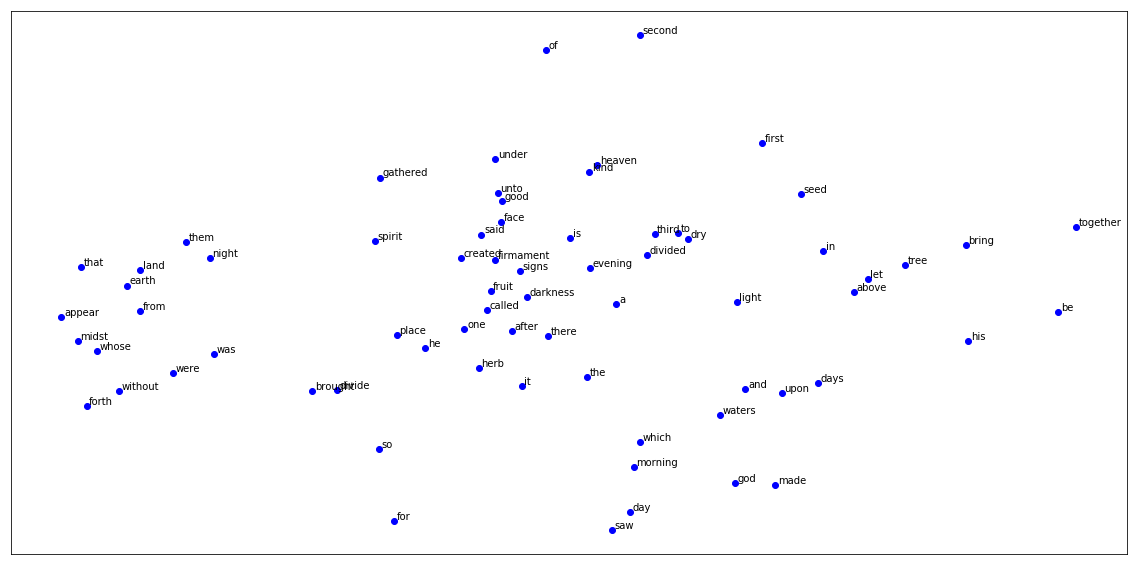

In [20]:
plt.figure( figsize = ( 20, 10 ) )


for i in range( 70 ):
    
    plt.plot( two_d[ i, 0 ], two_d[ i, 1 ], 'bo' )
    
    plt.text( two_d[ i, 0 ] + 0.03, two_d[ i, 1 ] + 0.03, sampled_words[ i ] )
    
    
plt.xticks( [] )

plt.yticks( [] )

Here, we notice that "was" and "were" are very close, "land" and "earth" are also very close. "god" and "made" are close, "morning" and "day" are close. So, we can interprete some meaning into this mapping.<br>
Class dismissed.